In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets

let's see how they look's like

In [2]:
diagnosis_df = pd.read_excel('patients_diagnosis.xlsx')
auscultation_df = pd.read_excel('auscultation_features.xlsx')

diagnosis_df = diagnosis_df.set_index(['patient_ID'])
auscultation_df = auscultation_df.set_index(['patient_ID'])

features = auscultation_df.columns.values
features = list(features[11:])

In [3]:
print(diagnosis_df.head())

           Diagnosis    age sex    IMC  weight  height
patient_ID                                            
101             URTI   3.00   F    NaN    19.0    99.0
102          Healthy   0.75   F    NaN     9.8    73.0
103           Asthma  70.00   F  33.00     NaN     NaN
104             COPD  70.00   F  28.47     NaN     NaN
105             URTI   7.00   F    NaN    32.0   135.0


In [4]:
print(auscultation_df.head())

           Diagnosis  age sex  IMC  weight  height          adq_format  start  \
patient_ID                                                                      
101             URTI  3.0   F  NaN    19.0    99.0  1b1_Al_sc_Meditron  0.036   
101             URTI  3.0   F  NaN    19.0    99.0  1b1_Al_sc_Meditron  0.579   
101             URTI  3.0   F  NaN    19.0    99.0  1b1_Al_sc_Meditron  2.450   
101             URTI  3.0   F  NaN    19.0    99.0  1b1_Al_sc_Meditron  3.893   
101             URTI  3.0   F  NaN    19.0    99.0  1b1_Al_sc_Meditron  5.793   

              end  crackles  wheezes  state       Var     Range  Coarse_Av  \
patient_ID                                                                   
101         0.579         0        0      0  0.000048  0.113594   0.000446   
101         2.450         0        0      0  0.000066  0.159031   0.012435   
101         3.893         0        0      0  0.000044  0.115345  -0.101963   
101         5.793         0        0      

In [5]:
print("Features to analyze")
print(features)

Features to analyze
['state', 'Var', 'Range', 'Coarse_Av', 'Fine_Av', 'Spectrum Av']


# Statistics

### Which and how many diagnostics of each one, are in the dataset 

In [6]:
diagnosis_df['Diagnosis'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Bronchiolitis      6
Pneumonia          6
LRTI               2
Asthma             1
Name: Diagnosis, dtype: int64

### Number of people with Crackles and/or Wheezes in at least one of their auscultation audios

In [7]:
number_c_w = auscultation_df.loc[auscultation_df['state'] > 0,['Diagnosis','age','sex','state']]
# remove repeated rows
number_c_w = number_c_w.drop_duplicates(subset=['Diagnosis','age','sex'], keep='first') 
print(number_c_w)
print('\n'+str(len(number_c_w))+' of 126 patients with any of this conditions')
print('\nDistributed like this: Only Crackles (Index 1), Only Wheezes (Index 2), Both (Index 3)')
print(number_c_w['state'].value_counts())

                Diagnosis   age  sex  state
patient_ID                                 
103                Asthma  70.0    F      2
104                  COPD  70.0    F      2
106                  COPD  73.0    F      1
107                  COPD  75.0    F      1
109                  COPD  84.0    F      1
...                   ...   ...  ...    ...
216         Bronchiolitis   1.0    M      1
219             Pneumonia  81.0    M      1
221                  COPD  74.0    F      2
223                  COPD   NaN  NaN      2
226             Pneumonia   4.0    M      1

[66 rows x 4 columns]

66 of 126 patients with any of this conditions

Distributed like this: Only Crackles (Index 1), Only Wheezes (Index 2), Both (Index 3)
1    38
2    20
3     8
Name: state, dtype: int64


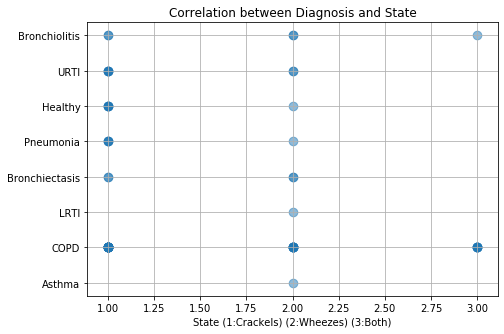

In [8]:
# Esta relacionado el diagnóstico con tener C, W o ambas?
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(number_c_w['state'],number_c_w['Diagnosis'], s=75, alpha=.5)

plt.title('Correlation between Diagnosis and State')
plt.xlabel('State (1:Crackels) (2:Wheezes) (3:Both)')
plt.grid(True)

# Sí, y podemos notar como los puntos con tonos mas oscuros son aquellos que
# se relacionan fuertemente, y los claros no. Por ejemplos las personas que 
# padecen COPD, tienen en su mayoria ambos (C & W), la mayoria de diagnósticos, en la mayoria
# de los casos presentan C y algunos otros W, sin embargo solo para Bronch y COPD
# presentan ambos.

### Features of auscultation cycles without Crackles or Wheezes

In [9]:
any_c_w = auscultation_df.loc[auscultation_df['state'] == 0, features]
any_c_w = any_c_w.describe()
any_c_w

,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
count,3642.0,3.642000e+03,3642.000000,3642.000000,3642.000000,3.642000e+03
mean,0.0,1.193481e-03,0.388487,-0.001282,-0.000120,6.007755e-07
std,0.0,2.839762e-03,0.460638,0.093403,0.022191,1.427217e-06
min,0.0,9.642802e-08,0.002815,-1.152474,-0.310829,4.153491e-11
25%,0.0,2.840777e-05,0.077589,-0.010511,-0.003023,1.438862e-08
50%,0.0,1.765182e-04,0.205141,-0.000288,-0.000027,8.902104e-08
75%,0.0,9.826176e-04,0.521051,0.008255,0.002794,4.978222e-07
max,0.0,4.033774e-02,2.936117,1.354314,0.365529,2.066292e-05


### Features of auscultation cycles with Only Crackles

In [10]:
only_crackles = auscultation_df.loc[auscultation_df['state'] == 1, features]
only_crackles = only_crackles.describe()
only_crackles

,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
count,1864.0,1.864000e+03,1864.000000,1864.000000,1864.000000,1.864000e+03
mean,1.0,1.445824e-03,0.542236,-0.002947,-0.001165,7.257461e-07
std,0.0,2.839023e-03,0.485124,0.098594,0.034198,1.425981e-06
min,1.0,9.701599e-08,0.003967,-0.758343,-0.294916,4.852559e-11
25%,1.0,1.085176e-04,0.184965,-0.015374,-0.006992,5.333458e-08
50%,1.0,4.720408e-04,0.387087,-0.000290,-0.000112,2.368138e-07
75%,1.0,1.634318e-03,0.745689,0.014746,0.006101,8.141661e-07
max,1.0,4.527466e-02,2.848768,1.625250,0.350306,2.253853e-05


### Features of auscultation cycles with Only Wheezes

In [11]:
only_wheezes = auscultation_df.loc[auscultation_df['state'] == 2, features]
only_wheezes = only_wheezes.describe()
only_wheezes

,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
count,886.0,8.860000e+02,886.000000,886.000000,886.000000,8.860000e+02
mean,2.0,3.043243e-03,0.559886,-0.010843,0.002533,1.543631e-06
std,0.0,7.072023e-03,0.591344,0.163561,0.037337,3.599746e-06
min,2.0,3.104253e-07,0.006402,-2.047764,-0.186309,1.580335e-10
25%,2.0,9.493528e-05,0.147722,-0.014935,-0.004085,4.846846e-08
50%,2.0,5.878429e-04,0.342562,-0.000152,0.000207,2.982085e-07
75%,2.0,2.382902e-03,0.740389,0.013695,0.004738,1.215346e-06
max,2.0,7.292195e-02,3.421153,1.893362,0.433157,3.685974e-05


### Features of auscultation cycles with Crackles and Wheezes

In [12]:
both_c_w = auscultation_df.loc[auscultation_df['state'] == 3, features]
both_c_w = both_c_w.describe()
both_c_w

,state,Var,Range,Coarse_Av,Fine_Av,Spectrum Av
count,506.0,5.060000e+02,506.000000,506.000000,506.000000,5.060000e+02
mean,3.0,2.271708e-03,0.590130,0.004311,-0.001196,1.147357e-06
std,0.0,4.581759e-03,0.541853,0.173277,0.028778,2.347203e-06
min,3.0,3.268198e-07,0.006327,-2.424723,-0.431638,1.630643e-10
25%,3.0,1.215953e-04,0.180335,-0.010403,-0.006209,6.146923e-08
50%,3.0,5.549011e-04,0.386970,0.000395,0.000123,2.829200e-07
75%,3.0,2.360277e-03,0.907443,0.016116,0.005407,1.197696e-06
max,3.0,5.431369e-02,2.894315,1.777617,0.087551,2.808853e-05


# Comparison between features of each condition

In [13]:
conditions = ['any_c_w','only_crackles','only_wheezes','both_c_w']
feature_colection = [any_c_w,only_crackles,only_wheezes,both_c_w]

Comparison between Averages for each feature of the auscultation signal

In [14]:
Variance = []
Range = []
Coarse_Av = []
Fine_Av = []
Spectrum_Av = []

for i in feature_colection:
    Variance.append(i['Var'][1])
    Range.append(i['Range'][1])
    Coarse_Av.append(i['Coarse_Av'][1])
    Fine_Av.append(i['Fine_Av'][1])
    Spectrum_Av.append(i['Spectrum Av'][1])

Text(0.5, 0, 'Condition')

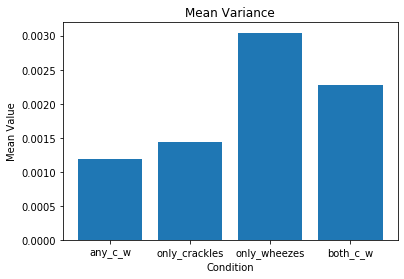

In [15]:
plt.figure()
plt.bar(conditions,Variance)
plt.title('Mean Variance')
plt.ylabel('Mean Value')
plt.xlabel('Condition')

Text(0.5, 0, 'Condition')

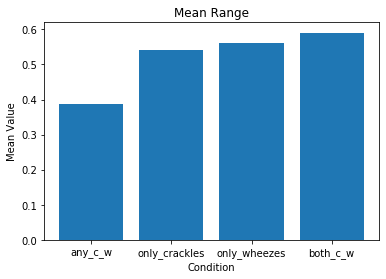

In [16]:
plt.figure()
plt.bar(conditions,Range)
plt.title('Mean Range')
plt.ylabel('Mean Value')
plt.xlabel('Condition')

Text(0.5, 0, 'Condition')

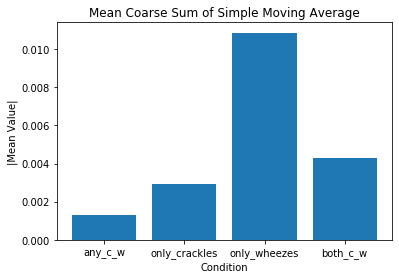

In [17]:
plt.figure()
plt.bar(conditions,np.abs(Coarse_Av))
plt.title('Mean Coarse Sum of Simple Moving Average')
plt.ylabel('|Mean Value|')
plt.xlabel('Condition')

Text(0.5, 0, 'Condition')

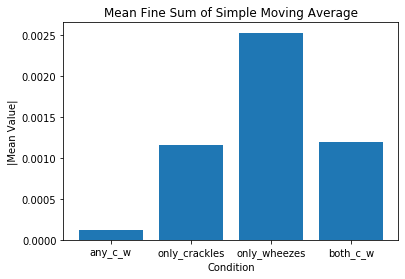

In [18]:
plt.figure()
plt.bar(conditions,np.abs(Fine_Av))
plt.title('Mean Fine Sum of Simple Moving Average')
plt.ylabel('|Mean Value|')
plt.xlabel('Condition')

Text(0.5, 0, 'Condition')

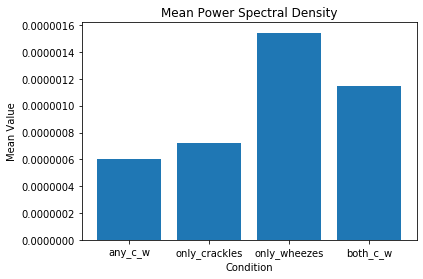

In [19]:
plt.figure()
plt.bar(conditions,Spectrum_Av)
plt.title('Mean Power Spectral Density')
plt.ylabel('Mean Value')
plt.xlabel('Condition')

## Let's see the distribution of the data

In [20]:
features = ['Var', 'Range', 'Coarse_Av', 'Fine_Av', 'Spectrum Av']
any_c_w = auscultation_df.loc[auscultation_df['state'] == 0, features]
only_crackles = auscultation_df.loc[auscultation_df['state'] == 1, features]
only_wheezes = auscultation_df.loc[auscultation_df['state'] == 2, features]
both_c_w = auscultation_df.loc[auscultation_df['state'] == 3, features]
features

['Var', 'Range', 'Coarse_Av', 'Fine_Av', 'Spectrum Av']

## For Healthy Cycles

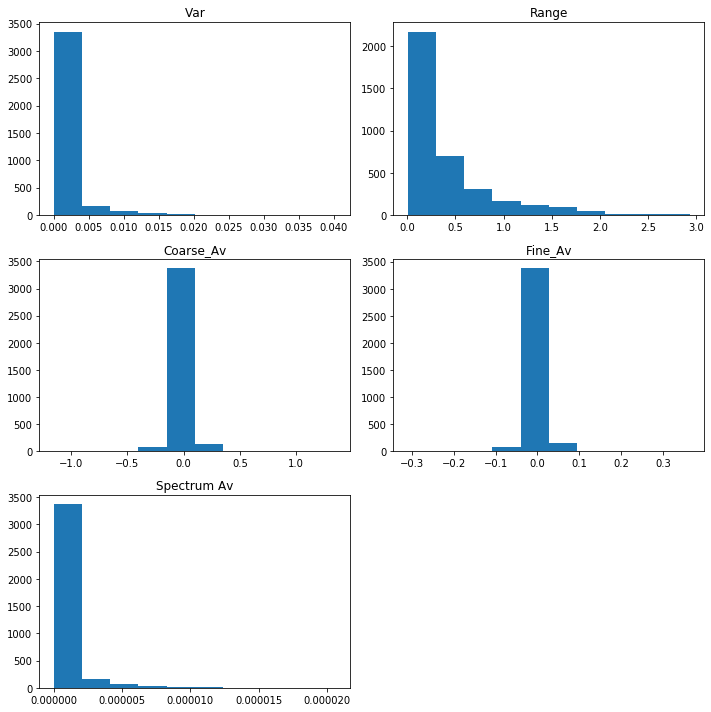

In [21]:
position = 1
plt.figure(figsize=(10,10))
for i in any_c_w:
    plt.subplot(3,2,position)
    plt.hist(any_c_w[i].values)
    plt.title(i)
    position += 1
plt.tight_layout()

## For Cycles with Only Crackles

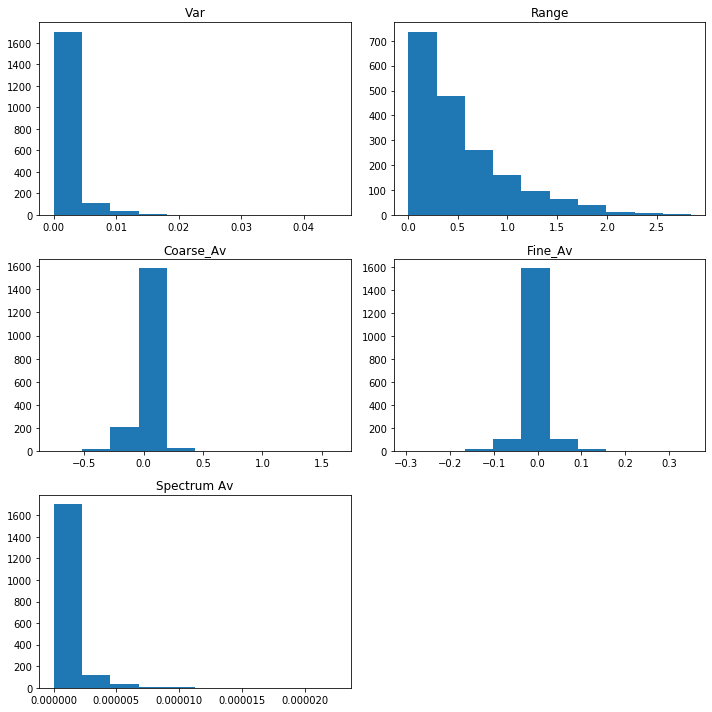

In [22]:
position = 1
plt.figure(figsize=(10,10))
for i in any_c_w:
    plt.subplot(3,2,position)
    plt.hist(only_crackles[i].values)
    plt.title(i)
    position += 1
plt.tight_layout()

## For Cycles with Only Wheezes

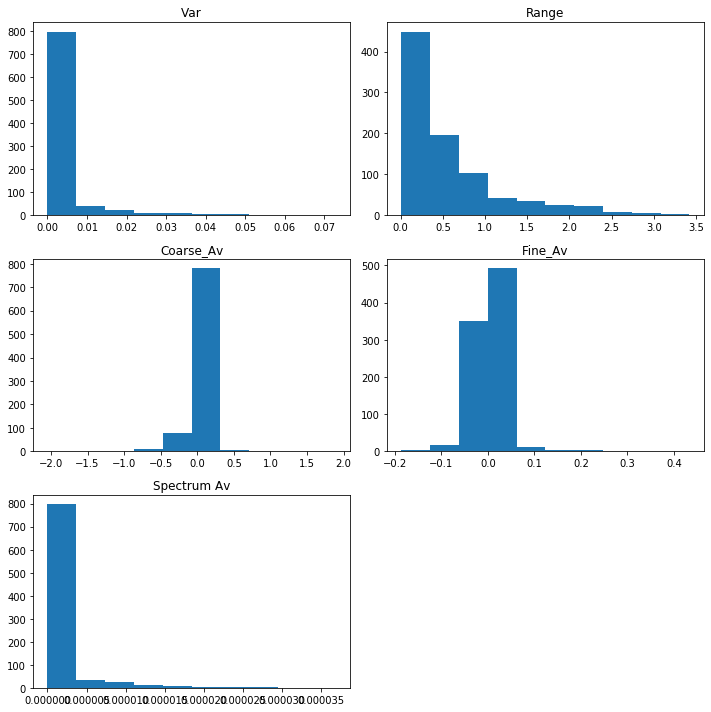

In [23]:
position = 1
plt.figure(figsize=(10,10))
for i in any_c_w:
    plt.subplot(3,2,position)
    plt.hist(only_wheezes[i].values)
    plt.title(i)
    position += 1
plt.tight_layout()

## For Cycles with Crackles and Wheezes

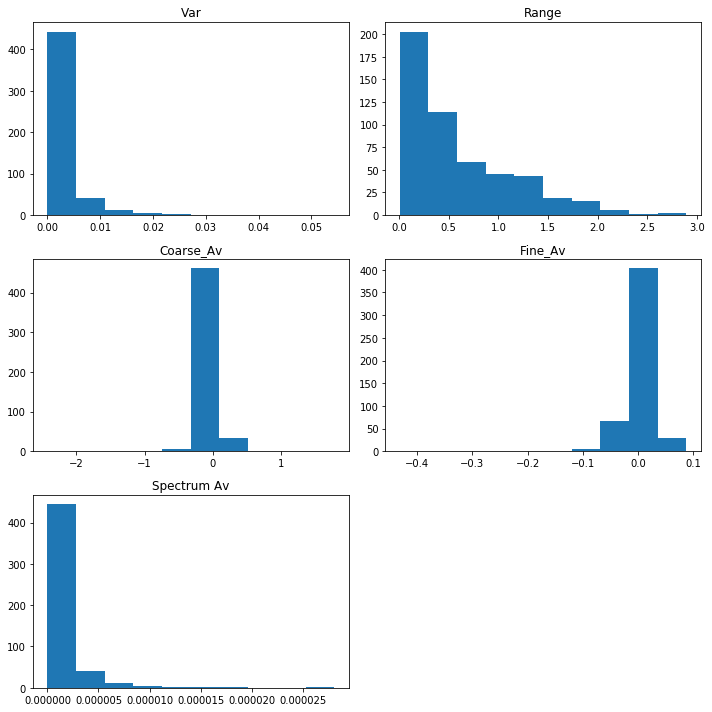

In [24]:
position = 1
plt.figure(figsize=(10,10))
for i in any_c_w:
    plt.subplot(3,2,position)
    plt.hist(both_c_w[i].values)
    plt.title(i)
    position += 1
plt.tight_layout()

# Let's verify distributions of Short Moving Averages and Spectrum_Av of any of those above

In [25]:
from statsmodels.graphics.gofplots import qqplot

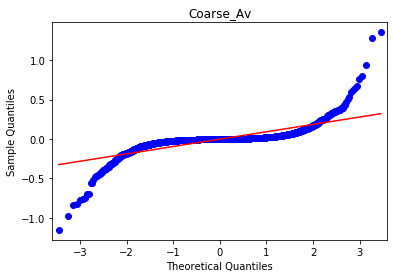

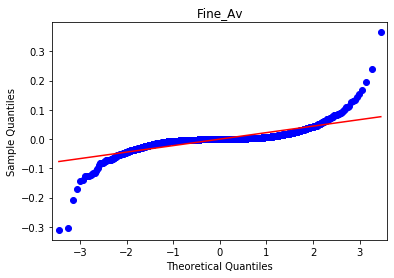

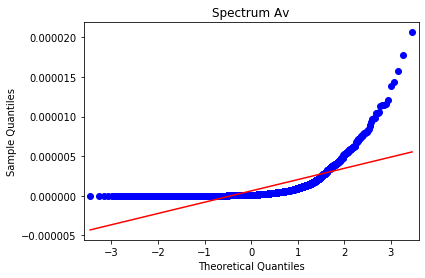

In [26]:
# For Healthy Cycles
qqplot(any_c_w['Coarse_Av'].values, line='s')
plt.title('Coarse_Av')
plt.show()
qqplot(any_c_w['Fine_Av'].values, line='s')
plt.title('Fine_Av')
plt.show()
qqplot(any_c_w['Spectrum Av'].values, line='s')
plt.title('Spectrum Av')
plt.show()

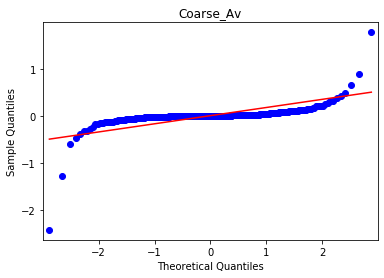

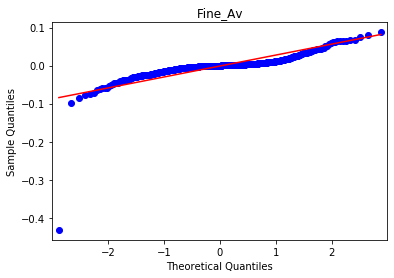

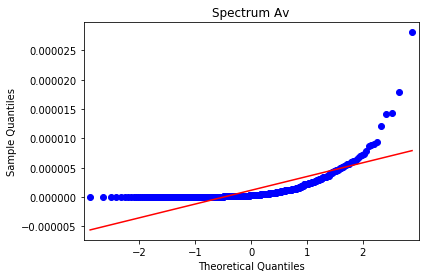

In [27]:
# For Cycles with Crackles and Wheezes
qqplot(both_c_w['Coarse_Av'].values, line='s')
plt.title('Coarse_Av')
plt.show()
qqplot(both_c_w['Fine_Av'].values, line='s')
plt.title('Fine_Av')
plt.show()
qqplot(both_c_w['Spectrum Av'].values, line='s')
plt.title('Spectrum Av')
plt.show()

##  Let's do a hypothetical test for Fine_Av and Spectrum_Av, for which first "apparently has normal distribution", and second does not.

# 1) Null and Alternative Hypothesis Tests

**Null**: Healthy **cycles** has **similar Fine_Av** to those who have Crackles and Wheezes.

**Alternative**: Healthy **cycles** has **different Fine_Av** to those who have Crackles and Wheezes.

# Parametric Analysis

In [28]:
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr, wilcoxon, mannwhitneyu

## Pearson's Correlation

In [29]:
pearsonr(any_c_w['Fine_Av'][:430].values,both_c_w['Fine_Av'][:430].values)

(0.027213911831310836, 0.5735838393591834)

This result shows that there is a positive, linear and weak relationship between healthy patients and those with Crackles and Wheezes. The relationship is about the 2%, but there exist a probability about 50% of get an extreme value of the distribution assuming that the null hypothesis is true, so **we can't reject the null hypothesis**

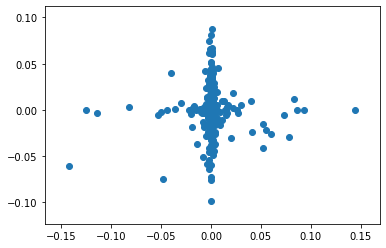

In [30]:
plt.scatter(any_c_w['Fine_Av'][:430].values,both_c_w['Fine_Av'][:430].values)

## In the correlation, the different outliers break the normal distribution, so they must be studied under a non-parametric analysis

## Two Sample T-Test

In [31]:
ttest_ind(any_c_w['Fine_Av'][:430].values, both_c_w['Fine_Av'][:430].values)

Ttest_indResult(statistic=0.38536778364947677, pvalue=0.70006046524553)

However, in 31% of cases I cannot identify without the subject being healthy or having Crackles and Wheezes.
**This is because parametric analysis is probably not the right study***

# Non-Parametric Analysis

In [32]:
spearmanr(any_c_w['Fine_Av'][:430].values, both_c_w['Fine_Av'][:430].values)

SpearmanrResult(correlation=0.051782663998711044, pvalue=0.2839979597004261)

In [33]:
mannwhitneyu(any_c_w['Fine_Av'][:430].values, both_c_w['Fine_Av'][:430].values)

MannwhitneyuResult(statistic=90933.0, pvalue=0.33857539885051546)

### Even if the data are not very closely related, there is a high probability that mixed results will be obtained because of the random. So the Alternative Hyphotesis can't be considered

# 2) Null and Alternative Hypothesis Tests

**Null**: Healthy **cycles** has **similar Spectrum Av** to those who have Crackles and Wheezes.

**Alternative**: Healthy **cycles** has **different Spectrum Av** to those who have Crackles and Wheezes.

# Non-Parametric Analysis

In [34]:
spearmanr(any_c_w['Spectrum Av'][:430].values, both_c_w['Spectrum Av'][:430].values)

SpearmanrResult(correlation=-0.09939593671315464, pvalue=0.039377264045743904)

In [35]:
mannwhitneyu(any_c_w['Spectrum Av'][:430].values, both_c_w['Spectrum Av'][:430].values)

MannwhitneyuResult(statistic=62830.0, pvalue=2.1110159275072014e-16)

## In this case, it becomes evident that the spectral power of healthy cycles is totally different from those that have Crackles and Wheezes